In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, classification_report


In [145]:
df = pd.read_csv('NFWBS_PUF_2016_data.csv')
df.head(5)

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [147]:
df.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,...,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,1967.854493,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,...,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,7123.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,9235.250000,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600582
50%,10901.500000,1.000000,3.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,2.000000,...,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.845213
75%,12570.750000,1.000000,3.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,3.000000,...,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.251415
max,14400.000000,3.000000,3.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.638674


In [148]:
print(df.nunique())

PUF_ID         6394
sample            3
fpl               3
SWB_1             9
SWB_2             9
               ... 
PPT612            2
PPT1317           2
PPT18OV           4
PCTLT200FPL       3
finalwt        3120
Length: 217, dtype: int64


In [149]:
df.isnull().any()

PUF_ID         False
sample         False
fpl            False
SWB_1          False
SWB_2          False
               ...  
PPT612         False
PPT1317        False
PPT18OV        False
PCTLT200FPL    False
finalwt        False
Length: 217, dtype: bool

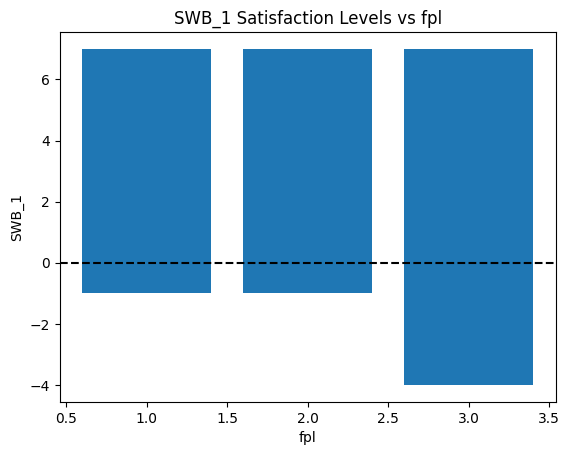

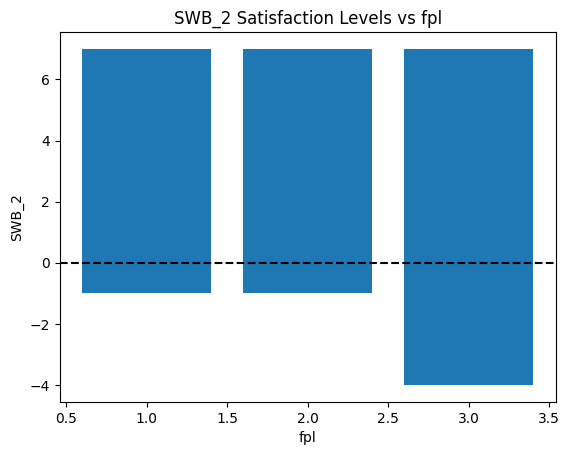

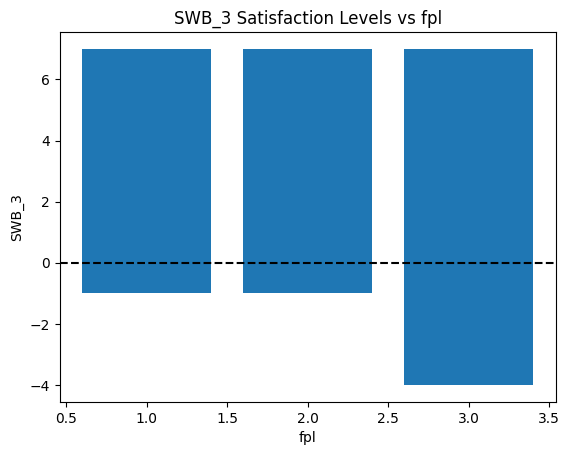

In [150]:
def is_satisfied(df):
    fpl_column = 'fpl'
    for column in df.columns :
        if column != fpl_column:
           plt.figure()
           plt.bar(df[fpl_column],df[column])
           plt.xlabel(fpl_column)
           plt.ylabel(column)
           plt.title(f'{column} Satisfaction Levels vs {fpl_column}')
           plt.axhline(y=0,color='black',linestyle='--')
           plt.show()
is_satisfied(df[['SWB_1', 'SWB_2', 'SWB_3', 'fpl']])

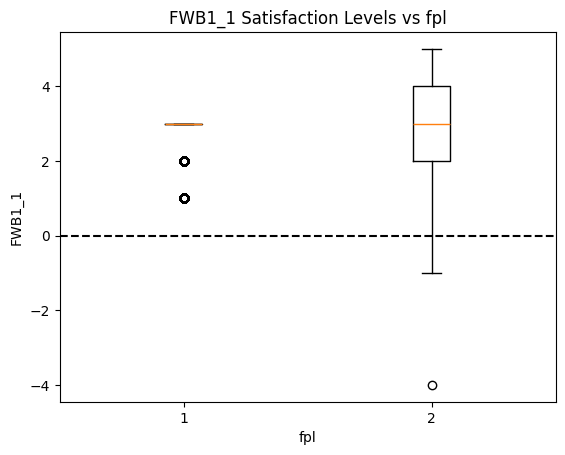

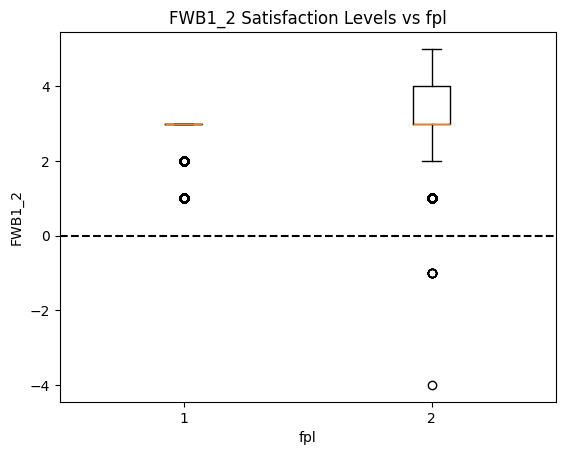

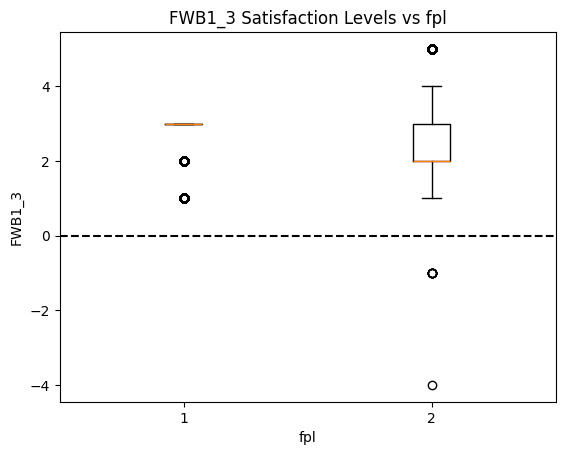

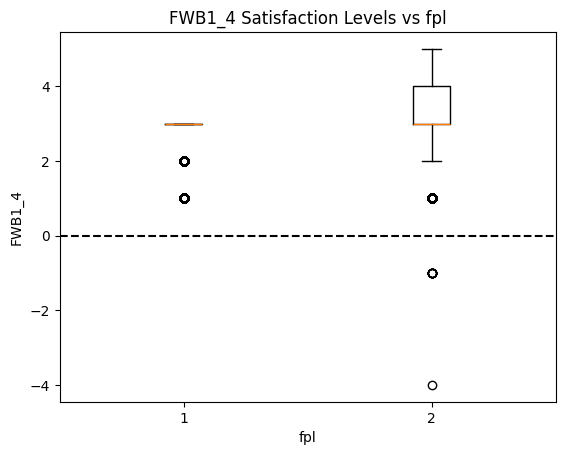

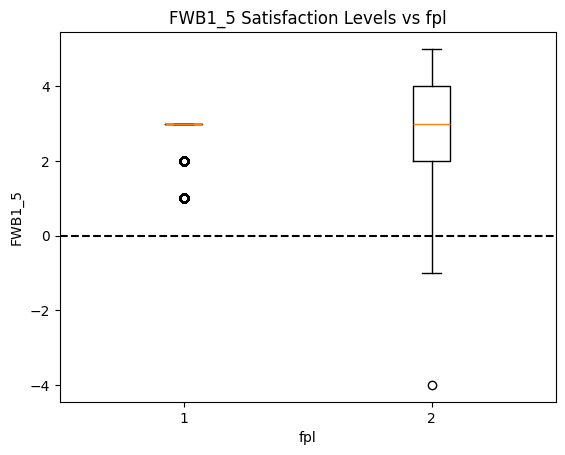

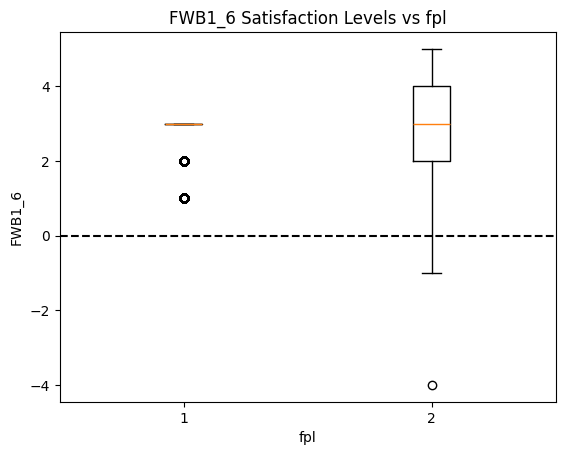

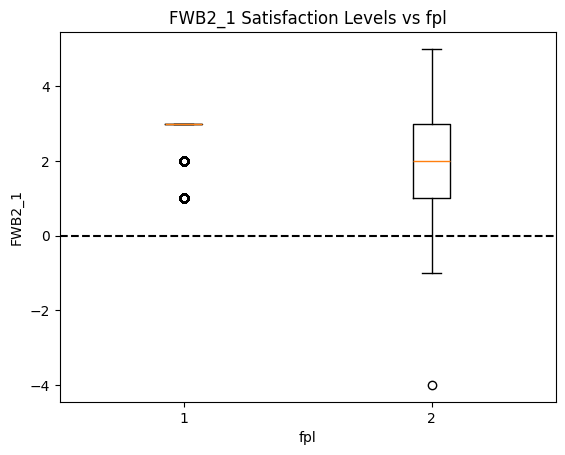

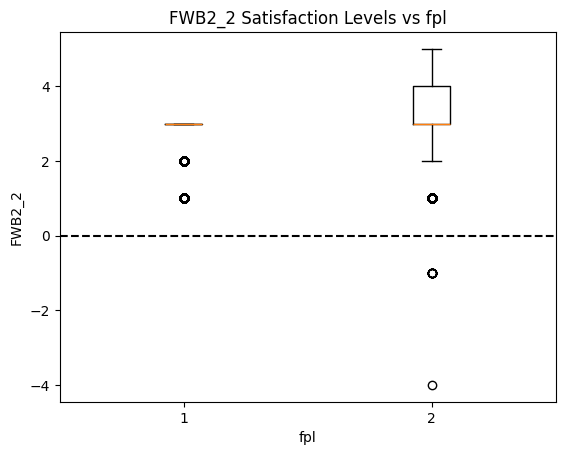

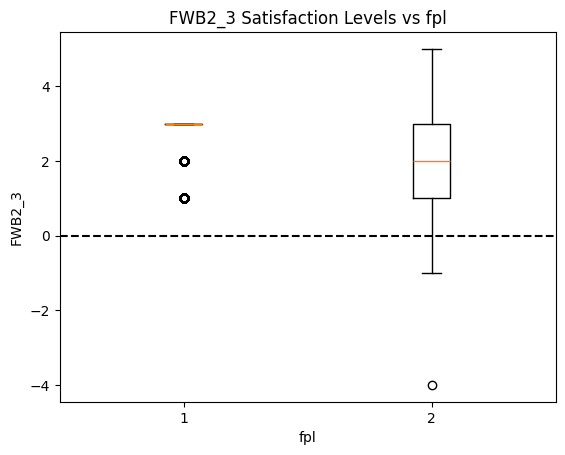

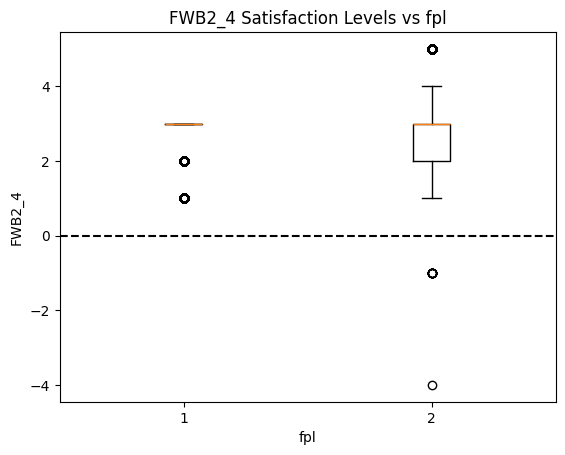

In [135]:
def is_comfortable(df):
    fpl_column = 'fpl'
    for column in df.columns:
        if column != fpl_column:
            plt.figure()
            plt.boxplot([df[fpl_column], df[column]])
            plt.xlabel(fpl_column)
            plt.ylabel(column)
            plt.title(f'{column} Satisfaction Levels vs {fpl_column}')
            plt.axhline(y=0, color='black', linestyle='--')
            plt.show()


is_comfortable(df[['FWB1_1', 'FWB1_2', 'FWB1_3', 'FWB1_4', 'FWB1_5', 'FWB1_6', 'FWB2_1', 'FWB2_2', 'FWB2_3', 'FWB2_4', 'fpl']])


In [136]:
fpl_map = {1 : 'low',2 : 'medium',3 : 'high'}

df['fpl'] = df['fpl'].map(fpl_map)

In [137]:
df.fillna(df.mode().iloc[0], inplace=True)

In [138]:
df = df.drop('finalwt',axis=1)

In [139]:

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


z_scores = stats.zscore(df[numerical_columns].values)


outliers = (np.abs(z_scores) > 3).any(axis=1)


outliers = outliers.astype(bool)


df = df[~outliers]


In [140]:

numerical_columns = df.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
df[numerical_columns.columns] = scaler.fit_transform(numerical_columns.values)

In [141]:

X = df.drop('fpl', axis=1)  # Features
y = df['fpl']  # Target


k_best = SelectKBest(score_func=f_classif, k=20)
X_new = k_best.fit_transform(X, y)


selected_features = X.columns[k_best.get_support()]


X_selected = X[selected_features]



X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
over_sampler =RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)


print(selected_features)
X_selected.nunique()

Index(['FWBscore', 'FWB1_1', 'FWB1_2', 'FWB1_3', 'FWB1_5', 'FWB2_1', 'FWB2_2',
       'SAVEHABIT', 'VALUERANGES', 'PRODHAVE_4', 'SNAP', 'MATHARDSHIP_1',
       'MATHARDSHIP_2', 'BENEFITS_1', 'BENEFITS_2', 'BENEFITS_3', 'PAREDUC',
       'HHEDUC', 'PPEDUC', 'PPINCIMP'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 62  71  79  89  91  92  93  94  95  96  97 100 123 124 125 128 129 130
 131 132 166 168 171 186 188 189 190 191 192 194 209 210] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


FWBscore         69
FWB1_1            5
FWB1_2            5
FWB1_3            5
FWB1_5            5
FWB2_1            5
FWB2_2            5
SAVEHABIT         6
VALUERANGES       6
PRODHAVE_4        2
SNAP              3
MATHARDSHIP_1     2
MATHARDSHIP_2     2
BENEFITS_1        2
BENEFITS_2        2
BENEFITS_3        2
PAREDUC           5
HHEDUC            5
PPEDUC            5
PPINCIMP          9
dtype: int64

In [142]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
predictions_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, predictions_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(y_test, predictions_dt))

Decision Tree Accuracy: 0.9322033898305084
              precision    recall  f1-score   support

        high       0.97      0.97      0.97       213
         low       0.80      0.67      0.73         6
      medium       0.53      0.59      0.56        17

    accuracy                           0.93       236
   macro avg       0.77      0.74      0.75       236
weighted avg       0.94      0.93      0.93       236



In [143]:
import joblib
joblib.dump(model_dt, 'fhs__model_dt.pkl') 

['fhs__model_dt.pkl']